離散フーリエ変換

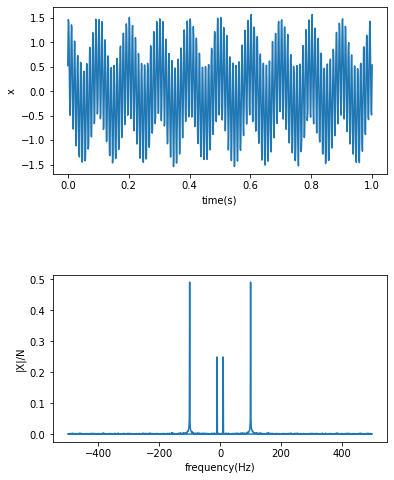

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#テストデータの生成
N = 1000
ts = 0.0
te = 1.0
#0~1の間で等差数列を1000個生成する
t = np.linspace(ts, te, N)
#振幅1.0で周波数が100HzのSin関数と，振幅0.5で周波数10HzのCos関数，振幅0.05のホワイトノイズの和で構成される1.0秒の信号
x = 1.0 * np.sin(2.0 * np.pi * 100.0 * t) + 0.5 * np.cos(2.0 * np.pi * 10.0 * t) + 0.05 * np.random.randn(N)

#DFT
X = np.fft.fft(x)
dt = t[1] - t[0]
f = np.fft.fftfreq(N, dt)

#data plot
fig, (ax01, ax02) = plt.subplots(nrows=2, figsize=(6, 8))
plt.subplots_adjust(wspace=0.0, hspace=0.6)

#入力信号
ax01.set_xlabel('time(s)')
ax01.set_ylabel('x')
ax01.plot(t, x)
#振幅スペクトル
ax02.set_xlabel('frequency(Hz)')
ax02.set_ylabel('|X|/N')
ax02.plot(f, np.abs(X)/N) #振幅スペクトル

plt.show()
#振幅スペクトルを見ると，100Hzが0.5，10Hzが0.25で入力の振幅の大きさの比と対応している
#入力信号が実数なら，振幅スペクトルを二倍した値の信号が含まれると解釈すればOK

DFTの応用その1

音声データの周波数解析

channel: 1
frame rate: 24000
duration: 3.7546666666666666 s


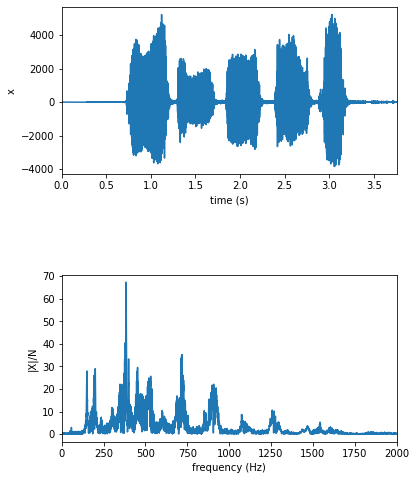

In [11]:
from pydub import AudioSegment

#第一引数はファイルパス，第二引数は拡張子
sounds = AudioSegment.from_file('/content/drive/MyDrive/Colab Notebooks/book/Pythonを用いたフーリエ・ウェーブレット解析入門/aiueo.m4a', 'm4a')

#基本情報の表示
print(f'channel: {sounds.channels}')
print(f'frame rate: {sounds.frame_rate}')
print(f'duration: {sounds.duration_seconds} s')

#ステレオ音声は右と左に別れているため，sigには片方のみが入るようにしている．
#今回はモノラルなのであんまり意味はない
sig = np.array(sounds.get_array_of_samples())[::sounds.channels]
dt = 1.0 / sounds.frame_rate #サンプリング時間

#時間アレイの作成
tms = 0.0
tme = sounds.duration_seconds
tm = np.linspace(tms, tme, len(sig), endpoint=False)

#DFT
N = len(sig)
X = np.fft.fft(sig)
f = np.fft.fftfreq(N, dt)

#データのプロット
fig, (ax01, ax02) = plt.subplots(nrows=2, figsize=(6,8))
plt.subplots_adjust(wspace=0.0, hspace=0.6)

#入力信号
ax01.set_xlim(tms, tme)
ax01.set_xlabel('time (s)')
ax01.set_ylabel('x')
ax01.plot(tm, sig)

#周波数成分
ax02.set_xlim(0, 2000)
ax02.set_xlabel('frequency (Hz)')
ax02.set_ylabel('|X|/N')
ax02.plot(f[0:N//2], np.abs(X[0:N//2])/N)

plt.show()